<a href="https://colab.research.google.com/github/ian-mcnair/ForageSnap/blob/master/Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Statements

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

!pip install tf-nightly-gpu-2.0-preview
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt

All of our data is stored on our university google drive!

In [96]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


# Loading The Model
This is the final production model, which needs to be loaded from where ever it is saved.

In [0]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/My Drive/Project FORSCAN/Models/Checkpoints/MBNV2CheckpointsIan1e-5Decay-7.30-10am9pm-09-0.75.hdf5')

# Loading the Data
The below loads and creates the testing data. This is data the model has never seen before. Some standard augmentations are done in order to keep the image processing consistent.

In [98]:
test_dir = '/content/drive/My Drive/Project FORSCAN/Datasets/PoC Testset'
test_dir

'/content/drive/My Drive/Project FORSCAN/Datasets/PoC Testset'

In [99]:
IMAGE_SIZE = 224
BATCH_SIZE = 1

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range = 45
    )

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

Found 689 images belonging to 14 classes.


In [100]:
filenames = test_generator.filenames
nb_samples = len(filenames)
print(filenames)
print(nb_samples)

['Edible: Alligator Juniper/00000001.jpg', 'Edible: Alligator Juniper/00000002.JPG', 'Edible: Alligator Juniper/00000003.jpg', 'Edible: Alligator Juniper/00000004.jpg', 'Edible: Alligator Juniper/00000005.jpg', 'Edible: Alligator Juniper/00000006.jpg', 'Edible: Alligator Juniper/00000007.jpg', 'Edible: Alligator Juniper/00000008.JPG', 'Edible: Alligator Juniper/00000009.jpg', 'Edible: Alligator Juniper/00000011.JPG', 'Edible: Alligator Juniper/00000012.jpg', 'Edible: Alligator Juniper/00000013.JPG', 'Edible: Alligator Juniper/00000014.JPG', 'Edible: Alligator Juniper/00000015.JPG', 'Edible: Alligator Juniper/00000016.JPG', 'Edible: Alligator Juniper/00000017.jpg', 'Edible: Alligator Juniper/00000018.JPG', 'Edible: Alligator Juniper/00000019.JPG', 'Edible: Alligator Juniper/00000020.JPG', 'Edible: Alligator Juniper/00000021.jpg', 'Edible: Alligator Juniper/00000022.jpg', 'Edible: Alligator Juniper/00000023.JPG', 'Edible: Alligator Juniper/00000024.jpg', 'Edible: Alligator Juniper/000000

# Predict on the Test Set
This usually takes awhile. The predict variable contains each samples class probabilities (14 classes, 689 samples)

In [0]:
predict = model.predict_generator(test_generator, steps = nb_samples)

In [102]:
predict

array([[9.4001055e-01, 9.2440238e-03, 1.0759754e-02, ..., 5.9354443e-07,
        3.3405476e-07, 3.7815124e-02],
       [9.9999332e-01, 5.3214332e-11, 1.2865980e-08, ..., 9.9485545e-11,
        3.3872263e-12, 1.4743564e-06],
       [9.9997497e-01, 3.2160030e-13, 3.5082000e-09, ..., 3.8779655e-14,
        5.3811630e-12, 2.4986475e-05],
       ...,
       [1.2349070e-05, 2.2461914e-04, 3.2572643e-06, ..., 9.6516679e-09,
        1.5769782e-08, 9.9975556e-01],
       [7.5483337e-02, 3.0329614e-03, 4.1163836e-02, ..., 1.3113212e-04,
        1.2792446e-02, 7.3679285e-03],
       [1.1344283e-06, 9.7856319e-09, 1.6276013e-09, ..., 1.7713130e-07,
        2.7468035e-09, 9.9999785e-01]], dtype=float32)

In [0]:
y_test = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 
print(y_test)
print(class_labels)

The below takes the maximum probability from each sample prediction and creates an array that contains the final prediction, which is what the model would officially predict.

In [104]:
y_pred = np.array([0 for i in range(nb_samples)])
for i in range(nb_samples):
  y_pred[i] = np.where(predict[i] == max(predict[i]))[0][0]

print(y_pred)

[ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  5  0  0  0  5 13  0
  0  0  0  1  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0
  1  1  1  1  1  1  1  1  1  1  1  4  1  1  1  1  1  1  1  1  1  1  1  1
 13  1  6  1  1  1  1  5  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1
  1  1  2  2  8 11  2  2  2  0  2  2  2  2  2  2  2  2  2 12  2  9  2  2
  2  2  2  2  2  1 12  2  2  2  2  2  2  2  2  5  2  2  2  2  2  2  2  2
  2  8  2  2  6  8  3  3  8 12  3 12  8  3  1  3  3 12 13  5  5  3  8  8
  3  6  3  3  3 12  3  3  3  3  3  8 12 10  3  8  1  3  3  3  3  9  8  8
  8  3  6 10  3  0  4  4  4  9  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  2  6  4  3  4  9  4  4  4  4  4  4  4
  4  4  4  4  4  4  1  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  1  5 12  5  0  5  5  5  5 13  5  5  5  5  2
  5  2  5 11  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  5  6  6  2  6  1  6  6  6  8  8

# Visualizing the Test Set and Model Metrics
Confusion Matrix and Multi-Class ROC Curve

## Multi-Class Confusion Matrix

In [0]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

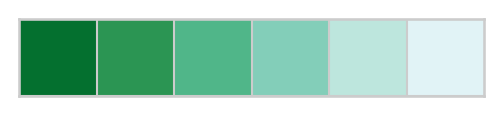

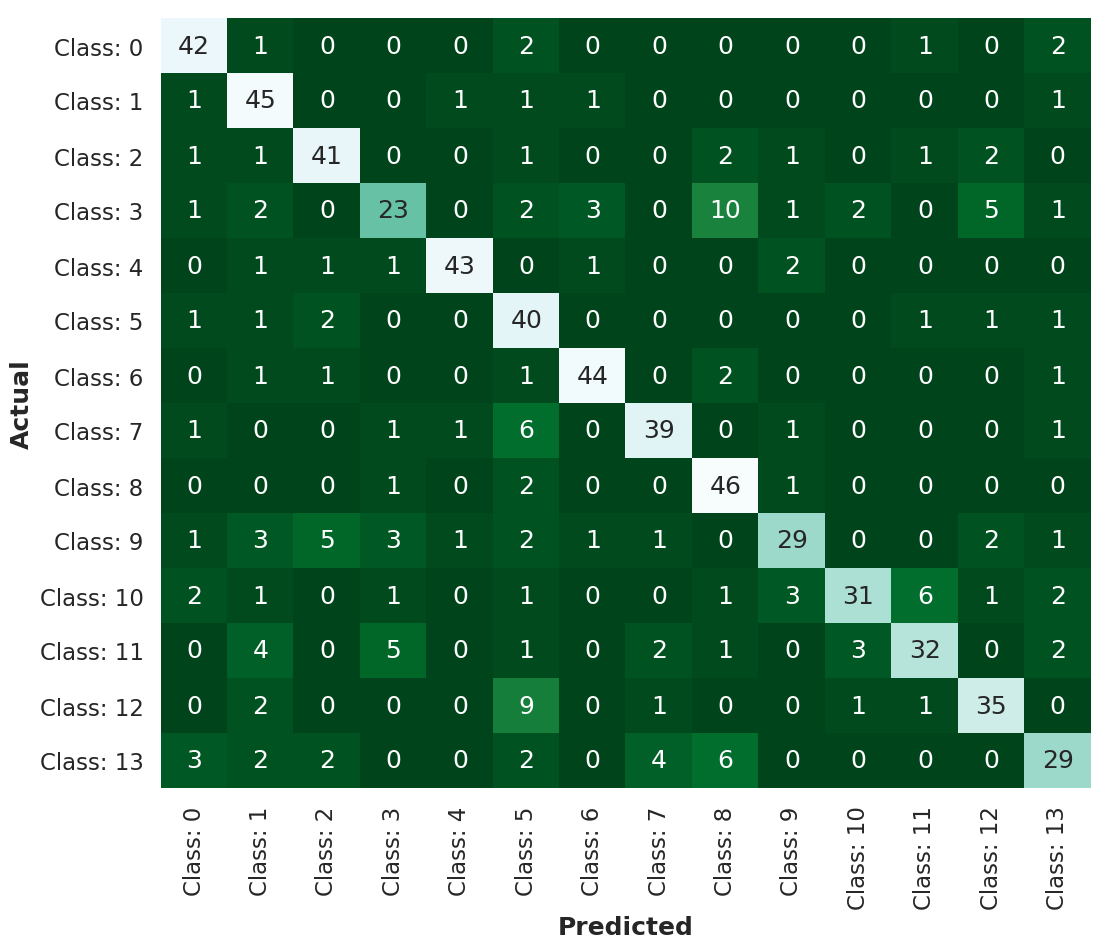

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt  

sns.set_style("whitegrid")
sns.set_context('talk')
sns.palplot(sns.color_palette("BuGn_r"))
plt.figure(figsize= (12,10))

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,  cmap = "BuGn_r", cbar = False); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted', fontdict= {'weight': 'bold'})
ax.set_ylabel('Actual', fontdict= {'weight': 'bold'})
ax.xaxis.set_ticklabels([f"Class: {i}" for i in range(14)], rotation = 90)
ax.yaxis.set_ticklabels([f"Class: {i}" for i in range(14)], rotation = 0)
plt.show()

### Accuracy and F1 For Multi-Class

In [108]:

from sklearn.metrics import (
    accuracy_score,
    f1_score
)

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average = "micro"))

0.7532656023222061
0.7532656023222062


# Getting the probabilities

In [109]:
proba = np.array([predict[i][y_test[i]] for i in range(nb_samples)])
proba

array([9.40010548e-01, 9.99993324e-01, 9.99974966e-01, 1.00000000e+00,
       9.98793125e-01, 9.92855251e-01, 9.99978900e-01, 9.96612012e-01,
       9.99360144e-01, 9.99329448e-01, 1.77385677e-02, 9.99999642e-01,
       9.97263312e-01, 9.99998689e-01, 9.99965310e-01, 9.99999166e-01,
       9.87884581e-01, 1.09794121e-02, 9.99949217e-01, 9.99999881e-01,
       9.99508858e-01, 3.40338618e-01, 9.73193720e-02, 4.84848946e-01,
       9.99435604e-01, 9.99972939e-01, 1.00000000e+00, 4.27675918e-02,
       9.99999881e-01, 9.85805094e-01, 7.83203304e-01, 9.99999642e-01,
       9.99047816e-01, 9.99402046e-01, 7.74609685e-01, 1.39302225e-03,
       9.99945641e-01, 9.99081612e-01, 9.99885321e-01, 7.46048748e-01,
       9.99905586e-01, 9.99273241e-01, 9.99994874e-01, 7.14546025e-01,
       9.99759972e-01, 1.00000000e+00, 1.00000000e+00, 9.99995232e-01,
       9.99999762e-01, 9.99987721e-01, 9.99997616e-01, 9.99774992e-01,
       9.99908090e-01, 9.91755843e-01, 1.00000000e+00, 9.99985695e-01,
      

# Simple Confusion Matrix
This considers only Edible vs Harmful

In [0]:
# Changes Classes 0-13 to 1 for Edible or 0 for Harmful
y_pred_simple = (y_pred < 8).astype(int)
y_test_simple = (y_test < 8).astype(int)

In [0]:
cm = confusion_matrix(y_test_simple, y_pred_simple, [1,0])

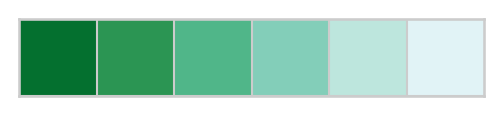

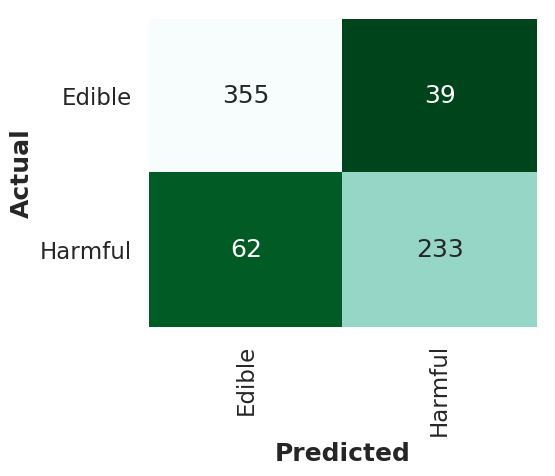

In [114]:
sns.set_style("whitegrid")
sns.set_context('talk')
sns.palplot(sns.color_palette("BuGn_r"))
plt.figure(figsize= (5,4))

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,  cmap = "BuGn_r", fmt = 'g', cbar = False); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted', fontdict= {'weight': 'bold'})
ax.set_ylabel('Actual', fontdict= {'weight': 'bold'})
ax.xaxis.set_ticklabels(['Edible', 'Harmful'], rotation = 90)
ax.yaxis.set_ticklabels(['Edible', 'Harmful'], rotation = 0)
plt.show()

# ROC for Binary Output
Function below calculates and creates the ROC Curve and AUC

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

def graph_roc(y_test, y_pred, prob, title, label, marker, color):
    fpr, tpr, thresholds = roc_curve(y_test, prob)
    auc_score = roc_auc_score(y_test, prob)
    plt.title(title)
    plt.plot(fpr, tpr, 
             label = label + ": " + str(auc_score)[:4], 
             marker = marker,
             color = color)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlim([-0.025, 1])
    plt.ylim([0, 1.05])
    plt.ylabel('True Positive Rate', fontdict={'weight': 'bold'})
    plt.xlabel('False Positive Rate', fontdict={'weight': 'bold'})
    plt.show()

In [0]:
# Grabs the total probability for a given class
predict[0][:8].sum()
predict[0][8:].sum()
proba = np.array([predict[i][:8].sum() for i in range(nb_samples)])

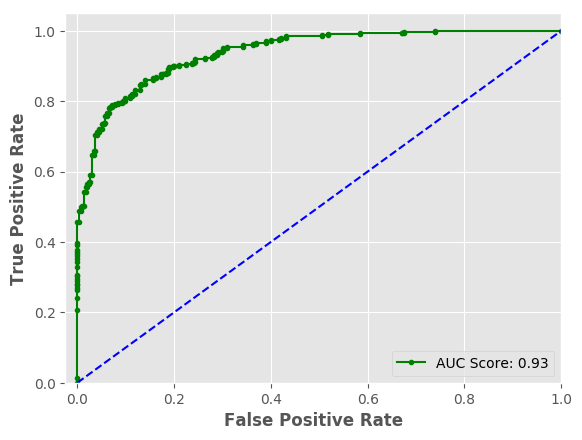

In [125]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('ggplot')
graph_roc(y_test_simple, y_pred_simple, proba, "", "AUC Score", ".", 'g')


# Multiclass ROC Curve
To do this properly, each sample needs to be have a corresponding vector that has a 1 on the true class and a 0 for every other class.
This and the probabilities together are used to do a one vs all ROC curve, which to some degree is misleading because of the number of samples.

In [0]:
y_actual = []

for i in range(nb_samples):
  y_actual.append([0 for j in range(14)])
  y_actual[i][y_test[i]] = 1

In [0]:
class_pred = []
y_true = []
for i in range(len(predict[0])):
  temp_pred = []
  temp_true = []
  for j in range(len(predict)):
    temp_pred.append(predict[j][i])
    temp_true.append(y_actual[j][i])
  class_pred.append(temp_pred)
  y_true.append(temp_true)

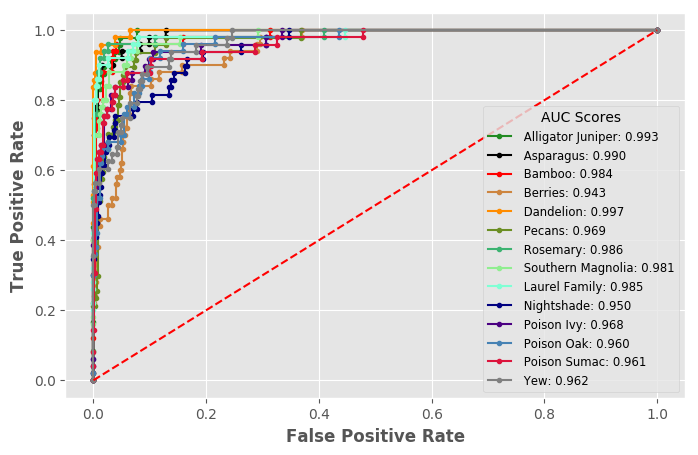

In [130]:
from matplotlib.font_manager import FontProperties
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('ggplot')

colors = ["forestgreen", 
          "black", 
          "red", 
          "peru", 
          "darkorange",
          "olivedrab",
          "mediumseagreen",
          "lightgreen",
          "aquamarine",
          "navy",
          "indigo",
          "steelblue",
          "crimson",
          "gray"]
plt.figure(figsize= (8,5))
for i in range(14):
  FPR, TPR, thresholds = roc_curve(y_true[i], class_pred[i])
  AUC = roc_auc_score(y_true[i], class_pred[i])
  plt.plot(FPR, 
          TPR, 
          colors[i],
          marker = ".", 
          label = ' '.join(class_labels[i].split(':')[1:]) +': '+ str(AUC)[:5])
plt.plot([0, 1], [0, 1],'r--')
fontP = FontProperties()
fontP.set_size('small')
plt.legend(title = "AUC Scores", prop=fontP)
plt.xlabel("False Positive Rate", fontdict = {"weight": "bold"})
plt.ylabel("True Positive Rate", fontdict = {"weight": "bold"})
plt.show()